# Project: Investigate No-show medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<ul>
    <li>Do no-show cases are less frequent for those patients who received an SMS?</li>
    <li>Do patients registered in Scholarship show up more at their appointments?</li>
    <li>Do Scheduled Day and Appointment Day are important to know in order to predict if a patient will show up for their scheduled appointment?</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset contains 110527 lines and <code>info()</code> shows us that there is no null value.

In [5]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Only tow types fo Gender, no ajustment needed.

In [6]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

Only two types of SMS received, could be used to explore wether is has some relation to no-show cases.

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Only two options of No-show, no ajustment needed.

In [8]:
type(df['ScheduledDay'][0])

str

In [9]:
type(df['AppointmentDay'][0])

str

ScheduledDay and AppointmentDay are of type string, this could be used for any relation with no-show cases. It must be cleaned to type datetime.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<code>describe</code> shows us that Age has a min value of -1, this show be investigated and cleaned.

In [11]:
df['Age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

There is one one case of age equals -1.

In [12]:
patient_id = float(df.query('Age == -1')['PatientId'])

df.query('PatientId == @patient_id')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Tried to find another appointment for this patient so I could copy its age.
Since there is not any other appointment for this patient, I may choose to remove this entire row on the cleaning phase.



### Data Cleaning (Replace this with more specific notes!)

In [3]:
# Formating the datetime columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [4]:
# Removing rows with age equals to -1
df = df[df.Age != -1]

<a id='eda'></a>
## Exploratory Data Analysis

### Do no-show cases are less frequent for those patients who received an SMS?

In [5]:
counts = df.groupby(['No-show', 'SMS_received']).count()['PatientId'];
counts

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: PatientId, dtype: int64

In [6]:
df_show = df[df['No-show'] == 'No']
total_show_no_sms_received = df_show[df_show['SMS_received'] == 0].shape[0]
total = df.shape[0]

show_no_sms_received_percent = (total_show_no_sms_received * 100) / total
show_no_sms_received_percent

56.55592349311474

Surprisingly 57% of patients who attended their appointment didn't even received the SMS.

In [7]:
df_no_show = df[df['No-show'] == 'No']
total_no_show_no_sms_received = df_no_show[df_no_show['SMS_received'] == 1].shape[0]
total = df.shape[0]

no_show_no_sms_received_percent = (total_no_show_no_sms_received * 100) / total
no_show_no_sms_received_percent

23.250637858965312

23% of patients who attended their appointment received SMS.

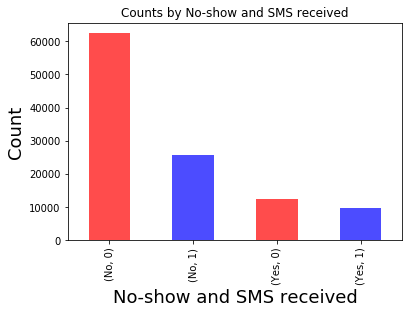

In [8]:
counts = df.groupby(['No-show', 'SMS_received']).count()['PatientId'];

colors=['red', 'blue']

counts.plot(kind='bar', title='Counts by No-show and SMS received', color=colors, alpha=.7);
plt.xlabel('No-show and SMS received', fontsize=18);
plt.ylabel('Count', fontsize=18);

### Do patients registered in Scholarship show up more at their appointments?

In [9]:
df.groupby(['Scholarship']).count()['PatientId']

Scholarship
0    99665
1    10861
Name: PatientId, dtype: int64

Patients registered in Bolsa Familia Scholarship consist in 9.82% of appointments.

In [10]:
df.groupby(['No-show', 'Scholarship']).count()['PatientId']

No-show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: PatientId, dtype: int64

In [11]:
(2578 * 100) / 10861

23.73630420771568

24% of patients registered in Bolsa Familia Scholarship didn't show up at the appointment

In [12]:
(19741 * 100) / 99665

19.807354638037424

while 20% of patients not registered in Bolsa Familia Scholarship didn't show up at the appointment

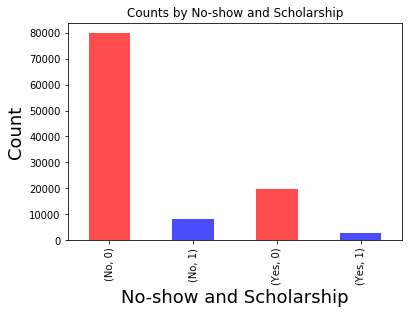

In [13]:
counts = df.groupby(['No-show', 'Scholarship']).count()['PatientId'];

colors=['red', 'blue']

counts.plot(kind='bar', title='Counts by No-show and Scholarship', color=colors, alpha=.7);
plt.xlabel('No-show and Scholarship', fontsize=18);
plt.ylabel('Count', fontsize=18);

Patients not registered in Bolsa-Familia Scholarship do more appointments than those registered.
24% of patients registered in Bolsa Familia Scholarship didn't show up at the appointment.
While 20% of patients not registered in Bolsa Familia Scholarship didn't show up at the appointment.

### Do Scheduled Day and Appointment Day are important to know in order to predict if a patient will show up for their scheduled appointment?

In [14]:
# Adding new column "days_between" containing the difference in days between ScheduledDay and Appoinment Day
df['days_between'] = df[['ScheduledDay', 'AppointmentDay']].apply(lambda row: row['AppointmentDay'].date() - row['ScheduledDay'].date(), axis=1)

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [26]:
df['days_between'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: days_between, dtype: object

In [29]:
df['days_between'].value_counts()

0 days      38562
2 days       6725
4 days       5290
1 days       5213
7 days       4906
6 days       4037
5 days       3277
14 days      2913
3 days       2737
8 days       2332
21 days      1861
28 days      1706
13 days      1682
9 days       1605
15 days      1503
10 days      1391
20 days      1187
22 days      1173
16 days      1151
12 days      1115
17 days      1107
29 days      1089
19 days      1044
18 days      1021
27 days      1013
11 days       987
35 days       963
23 days       822
34 days       808
26 days       731
            ...  
109 days        5
98 days         5
95 days         5
111 days        5
112 days        5
102 days        4
119 days        4
96 days         4
105 days        4
-1 days         4
92 days         3
122 days        3
94 days         2
110 days        2
107 days        2
97 days         2
93 days         2
115 days        2
117 days        1
127 days        1
151 days        1
125 days        1
126 days        1
101 days        1
82 days   

There are many cases where Scheduled Day and Appointment Day happened at the same day.

In [30]:
zero_days = pd.Timedelta('0 days')
df[df['days_between'] < zero_days]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


There are 5 cases where the appointment date happened before the scheduled date, all of them are are a no-show case.

In [33]:
df[df['days_between'] == zero_days]['No-show'].value_counts()

No     36770
Yes     1792
Name: No-show, dtype: int64

There are 1792 cases of no-show even for medical appointments scheduled at the same day of the appointment.

In [43]:
df.groupby(['No-show', 'days_between']).count()['PatientId']

No-show  days_between
No       0 days          36770
         1 days           4100
         2 days           5123
         3 days           2093
         4 days           4059
         5 days           2405
         6 days           3036
         7 days           3597
         8 days           1662
         9 days           1165
         10 days           951
         11 days           675
         12 days           762
         13 days          1146
         14 days          2000
         15 days          1001
         16 days           800
         17 days           757
         18 days           709
         19 days           681
         20 days           779
         21 days          1286
         22 days           769
         23 days           546
         24 days           387
         25 days           381
         26 days           468
         27 days           693
         28 days          1203
         29 days           733
                         ...  
Yes      81 days 

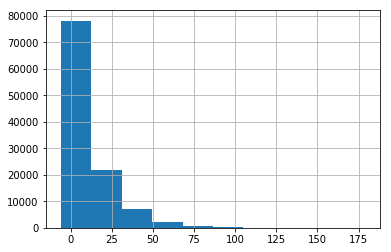

In [71]:
df['days_between'].apply(lambda td: td.days).hist();

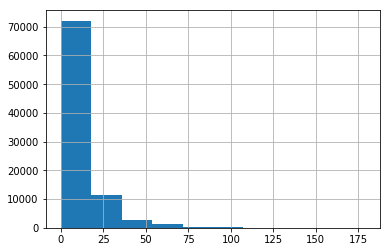

In [72]:
# Histogram for days_between for patients who showed up for the appointment.
df[df['No-show'] == 'No']['days_between'].apply(lambda td: td.days).hist();

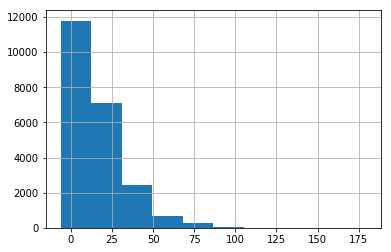

In [73]:
# Histogram for days_between for patients who dit not showed up for the appointment.
df[df['No-show'] == 'Yes']['days_between'].apply(lambda td: td.days).hist();

<a id='conclusions'></a>
## Conclusions

Patients not registered in Bolsa-Familia Scholarship do more appointments than those registered. 24% of patients registered in Bolsa Familia Scholarship didn't show up at the appointment. While 20% of patients not registered in Bolsa Familia Scholarship didn't show up at the appointment.

Based on the analisys made, it is difficult to conclude that petients who received SMS or participate in Bolsa Familia Scholarship indicate that they will show up at the appointment. There are many cases where Scheduled Day and Appointment Day happened at the same day, possibly meaning that the patient went directly to ambulatory. There are 1792 cases of no-show even for medical appointments scheduled at the same day of the appointment. This could indicate that the patient went to the ambulatory but there was a long waiting time and gave up the appointment.